# Python Practice Lecture 19 MATH 342W Queens College
# - Model Selection
Author: Amir ElTabakh
Date: April 14, 2022
Agenda:
* Model Selection and Three Data Splits
* * Use Case (I) Selecting one of $M$ Explicit Models
* * Use Case (II) Forward Stepwise Model Construction
* * Use Case (III) Hyperparameter Selection **(won't do)**

This unit is split into three use cases (1) Selection among M explicit models (2) Hyperparameter Selection within one algorithm (3) Stepwise Model Construction.

I won't be doing Hyperparameter tuning, but there is a lot of good stuff on the topic, such as this blog on [Towards Data Science](https://towardsdatascience.com/the-art-of-hyperparameter-tuning-in-python-c581a129d4e4).

We have now covered non-linearities (e.g. polynomial terms) and interactions. A new complication now clearly emerges. If I have $p$ predictors, there are many linear least squares models I can build (considering non-linear least squares models makes the space of models even larger!!)

## Use Case (I): Selecting one of $M$ Explicit Models

We'll be using the diamonds dataset.

In [1]:
# importing dependencies
import numpy as np
import random
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import pandas as pd

# Data viz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("colorblind")) # setting color palette
sns.set(rc={"figure.figsize":(10, 6)}) #width=10, #height=6

In [2]:
# URL for Diamonds Data
url = "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv"
diamonds = pd.read_csv(url)
diamonds = diamonds.iloc[:, 1:]

# snapshot of dataframe
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# lets massage our data

# defining y
y = diamonds['price']

# use the Pandas.copy() method to shallow copy
X = diamonds.copy()
del X['price'] # removing y from X

# Dummify Categorical Variables in X
X = pd.get_dummies(X)

X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
# function to conveniently output R^2 and RMSE
def solve_performance(model, y, predict_data):        
    # get yhat
    yhat = model.predict(predict_data)
    
    # residual error
    e = y - yhat
    
    # variance of y
    s_sq_y = np.var(y)

    # variance of e
    s_sq_e = np.var(e)

    # R^2
    rsq = (s_sq_y - s_sq_e) / s_sq_y
    
    # SSE
    sse = pd.Series(e**2).sum()

    # MSE
    mse = sse / len(y)
    
    # RMSE
    rmse = np.sqrt(mse)
    
    # output
    print(f"Rsq: {round(rsq, 5)}")
    print(f"RMSE: {round(rmse, 5)}\n")

In [5]:
# model 1
model_1 = smf.ols('price ~ carat + depth', data = diamonds).fit()

# get performance metrics for model 1
solve_performance(model = model_1,
               y = diamonds['price'],
               predict_data = diamonds[['carat', 'depth']])

# model 2
model_2 = smf.ols('price ~ carat + depth + color + x + y + z', data = diamonds).fit()

# get performance metrics for model 2
solve_performance(model = model_2,
               y = diamonds['price'],
               predict_data = diamonds[['carat',
                                        'depth',
                                        'color',
                                        'x', 'y', 'z']])

# model 3
# model_3 = smf.ols('price ~ .', data = diamonds) # `.` operator not valid in Python

model_3 = LinearRegression().fit(X, y)

# get performance metrics for model 3
solve_performance(model = model_3,
                y = y,
                predict_data = X)


# model 4
model_4 = LinearRegression().fit(X * X, y)

# get performance metrics for model 4
solve_performance(model = model_4,
                y = y,
                predict_data = X*X)

Rsq: 0.85068
RMSE: 1541.60631

Rsq: 0.87212
RMSE: 1426.63891

Rsq: 0.91979
RMSE: 1129.84299

Rsq: 0.91098
RMSE: 1190.27771



Obviously the in-sample $R^2$'s are increasing due to the complexity, but which model is "best"?

This is one of the most fundamental problems in statistics, and possibly all of science! 

In class, we discussed validation via dividing $\mathbb{D}$ into (a) a training set and a (b) testing set. Now, we will further divide the training set into (a) a sub-training set and a (b) selection set and we still have the (c) test set. 

The total training set together will fit a model and testing will estimate future performance. But within the total training set, we'll use an elaborate algorithim: we'll fit many models and take the best one. That's the "master algorithm".

We'll make the selection set and the test set the same size but we don't have to. First split up the data:

In [6]:
# setting constants
random.seed(2000)
n = len(diamonds)
K = 10
prop_train = (K - 1) / K
n_train_master = int(prop_train * n)

# setting indices
indices = set([i for i in range(n)])
index_master_train = set(random.sample(indices, n_train_master))
index_select = indices - index_master_train

# Now we have a master_train and select
# We'll split the master_train into train and test now
n_train = int(prop_train * n_train_master)
index_train = set(random.sample(index_master_train, n_train))
index_test = index_master_train - index_train

# check
print(len(diamonds))
print(len(index_test) + len(index_train) + len(index_select))

53940
53940


Now that we have our indices, lets create the datasets.

In [7]:
# split based on indices
X_train = pd.DataFrame([X.iloc[i] for i in index_train])
y_train = pd.Series([y[i] for i in index_train])

X_test = pd.DataFrame([X.iloc[i] for i in index_test])
y_test = pd.Series([y[i] for i in index_test])

X_select = pd.DataFrame([X.iloc[i] for i in index_select])
y_select = pd.Series([y[i] for i in index_select])

Now, fit all models on the training set, get **in sample** performance metrics.

In [8]:
# model 1
X_train_1 = X_train[['carat', 'depth']]
model_1 = LinearRegression().fit(X_train_1, y_train)

# get in sample performance metrics for model 1
solve_performance(model = model_1,
               y = y_train,
               predict_data = X_train_1)

# model 2
X_train_2 = X_train[['carat',
                    'depth',
                    'color_D', 'color_E', 'color_F', 'color_G',
                    'color_H', 'color_I', 'color_J',
                    'x', 'y', 'z']]

model_2 = LinearRegression().fit(X_train_2, y_train)

# get in sample performance metrics for model 2
solve_performance(model = model_2,
               y = y_train,
               predict_data = X_train_2)

# model 3
model_3 = LinearRegression().fit(X_train, y_train)

# get in sample performance metrics for model 3
solve_performance(model = model_3,
                y = y_train,
                predict_data = X_train)


# model 4
model_4 = LinearRegression().fit(X_train * X_train, y_train)

# get in sample performance metrics for model 4
solve_performance(model = model_4,
                y = y_train,
                predict_data = X_train * X_train)

Rsq: 0.85069
RMSE: 1542.33733

Rsq: 0.87286
RMSE: 1423.2295

Rsq: 0.92006
RMSE: 1128.54461

Rsq: 0.91162
RMSE: 1186.58528



Now, fit all models on the training set, get **out of sample** performance metrics.

In [9]:
# model 1
X_train_1 = X_train[['carat', 'depth']]
model_1 = LinearRegression().fit(X_train_1, y_train)

# get oos performance metrics for model 1
X_test_1 = X_test[['carat', 'depth']]

solve_performance(model = model_1,
               y = y_test,
               predict_data = X_test_1)


# model 2
X_train_2 = X_train[['carat',
                    'depth',
                    'color_D', 'color_E', 'color_F', 'color_G',
                    'color_H', 'color_I', 'color_J',
                    'x', 'y', 'z']]

model_2 = LinearRegression().fit(X_train_2, y_train)

# get oos performance metrics for model 2
X_test_2 = X_test[['carat',
                    'depth',
                    'color_D', 'color_E', 'color_F', 'color_G',
                    'color_H', 'color_I', 'color_J',
                    'x', 'y', 'z']]

solve_performance(model = model_2,
               y = y_test,
               predict_data = X_test_2)


# model 3
model_3 = LinearRegression().fit(X_train, y_train)

# get oos performance metrics for model 3
solve_performance(model = model_3,
                y = y_test,
                predict_data = X_test)


# model 4
model_4 = LinearRegression().fit(X_train * X_train, y_train)

# get oos performance metrics for model 4
solve_performance(model = model_4,
                y = y_test,
                predict_data = X_test * X_test)

Rsq: 0.85672
RMSE: 1537.21615

Rsq: 0.88179
RMSE: 1396.5831

Rsq: 0.92437
RMSE: 1116.95235

Rsq: 0.89978
RMSE: 1285.62896



Which are overfit? Which are underfit? Were these models "poor choices"? Can we go back and fit some more models? 

Yes - as long as we don't open the "lockbox" of the test set. We can go further and fit more and more models but we should always be careful that we don't fit too many as we may optimize to the selection set. Here, we are lucky since the selection set is large (~11,000 observations) so this is not too much of a fear.

But you can see the problem - how can we build a good model?

The answer to this is non-parametric regression / machine learning. But first, we will cover two other important topics before we get there.

Let us return and complete the exercise by now declaring we are done modeling and we are going to ship model 3. Now that we know we're using Model 3, lets append `X_train` and `X_test` and now we will use `X_select` as the test set. Let us get a conservative estimate of its performance:

In [10]:
# defining master train
X_train_master = pd.DataFrame([X.iloc[i] for i in index_master_train])
y_train_master = pd.Series([y[i] for i in index_master_train])

# fitting model 3
model_3 = LinearRegression().fit(X_train_master, y_train_master)

# get oos *select* performance metrics for model 3
solve_performance(model = model_3,
                y = y_select,
                predict_data = X_select)

Rsq: 0.91245
RMSE: 1156.23815



The test and select sets seem to perform about the same. We did not overfit too much on the select set. At this point the lockbox is open and we can never return (if we are honest, of course - many people in this business lie so beware).

This is the model we will ship to production!

Two improvements using CV to the above:

* To reduce variance in the selection process, you make a CV of the selection set. 
* To reduce variance in the testing process, you make an outer CV of the test set. This is a lot more coding! (good lab question)

Professor Kapelner uses the R MLR package to show off this process. I don't know if such a library exists in Python. You could use the SKLearn's train test split function twice to get your train, test and select datasets.

SKLearn has a bunch of splitter classes, [check them out](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

## Use Case (II): Forward Stepwise Model Construction

There are many types of such stepwise models. Here we will look at Forward Stepwise Linear models. "Forward" meaning we start with a low complexity model and end with a high complexity model, "Stepwise" meaning we do so iteratively which each step consisting of one additional degree of freedom i.e. one incremental increase in complexity and "Linear" meaning that the model is linear. By default we use OLS.

We will be using the diamonds data again as an example.

In [11]:
# snapshot
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


What we're doing will be highly computational, so let's take a small random sample of the dimaonds in $\mathbb{D}$ for training and testing:

In [12]:
# constants
samp_size_train = 1000
samp_size_test = 300
samp_size = samp_size_train + samp_size_test

# take a sample of df
diamonds_sample = diamonds.sample(n = samp_size, random_state = 1001)

diamonds_sample

,carat,cut,color,clarity,depth,table,price,x,y,z
22208,1.21,Ideal,G,VVS2,60.6,56.0,10256,6.90,6.89,4.18
13027,0.26,Premium,H,VVS2,62.4,58.0,600,4.07,4.04,2.53
23817,1.22,Ideal,F,VVS2,62.7,54.0,11880,6.79,6.84,4.27
22147,2.01,Good,I,SI1,64.1,60.0,10184,7.92,7.88,5.06
8172,1.05,Premium,F,SI2,61.7,60.0,4363,6.58,6.49,4.03
...,...,...,...,...,...,...,...,...,...,...
18025,1.50,Premium,H,SI2,62.3,59.0,7291,7.27,7.21,4.52
35600,0.31,Ideal,H,VVS1,61.6,55.0,907,4.38,4.35,2.69
17402,1.09,Ideal,H,SI1,61.4,56.0,6970,6.61,6.64,4.07
34200,0.33,Ideal,F,VS2,61.9,57.0,854,4.42,4.40,2.73


Make sure to reset the index.

In [13]:
diamonds_sample = diamonds_sample.reset_index()
diamonds_sample

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,22208,1.21,Ideal,G,VVS2,60.6,56.0,10256,6.90,6.89,4.18
1,13027,0.26,Premium,H,VVS2,62.4,58.0,600,4.07,4.04,2.53
2,23817,1.22,Ideal,F,VVS2,62.7,54.0,11880,6.79,6.84,4.27
3,22147,2.01,Good,I,SI1,64.1,60.0,10184,7.92,7.88,5.06
4,8172,1.05,Premium,F,SI2,61.7,60.0,4363,6.58,6.49,4.03
...,...,...,...,...,...,...,...,...,...,...,...
1295,18025,1.50,Premium,H,SI2,62.3,59.0,7291,7.27,7.21,4.52
1296,35600,0.31,Ideal,H,VVS1,61.6,55.0,907,4.38,4.35,2.69
1297,17402,1.09,Ideal,H,SI1,61.4,56.0,6970,6.61,6.64,4.07
1298,34200,0.33,Ideal,F,VS2,61.9,57.0,854,4.42,4.40,2.73


Let's define our $X$ and $y$.

In [14]:
# defining y
y = diamonds_sample['price']

# use the Pandas.copy() method to shallow copy
X = diamonds_sample.copy()
del X['price'] # removing y from X

# Dummify Categorical Variables in X
X = pd.get_dummies(X)

X

,index,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,22208,1.21,60.6,56.0,6.90,6.89,4.18,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,13027,0.26,62.4,58.0,4.07,4.04,2.53,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,23817,1.22,62.7,54.0,6.79,6.84,4.27,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,22147,2.01,64.1,60.0,7.92,7.88,5.06,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8172,1.05,61.7,60.0,6.58,6.49,4.03,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,18025,1.50,62.3,59.0,7.27,7.21,4.52,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1296,35600,0.31,61.6,55.0,4.38,4.35,2.69,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1297,17402,1.09,61.4,56.0,6.61,6.64,4.07,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1298,34200,0.33,61.9,57.0,4.42,4.40,2.73,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Great! The data is looking good. Let's built a model with all first-order interactions. You can solve for second order interactions by changing the parameter of the `PolynomialFeatures` function from a 2 to a 3. Leave it at 2, or else it will take hours for the models to fit later.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X = pd.DataFrame(poly.fit_transform(X))

Now we train-test-split.

In [16]:
# setting constants
random.seed(2000)
n = len(diamonds_sample)
K = 5
prop_train = (K - 1) / K
n_train = int(prop_train * n)

# setting indices
indices = set([i for i in range(n)]) # good thing we reset the index
index_train = set(random.sample(indices, n_train))
index_test = indices - index_train

# split based on indices
X_train = pd.DataFrame([X.iloc[i] for i in index_train])
y_train = pd.Series([y[i] for i in index_train])

X_test = pd.DataFrame([X.iloc[i] for i in index_test])
y_test = pd.Series([y[i] for i in index_test])

In [17]:
# constructing model
model_X_poly = LinearRegression(fit_intercept = False).fit(X_train, y_train)

# in sample
solve_performance(model = model_X_poly,
               y = y_train,
               predict_data = X_train)

# oos
solve_performance(model = model_X_poly,
               y = y_test,
               predict_data = X_test)

Rsq: 0.99024
RMSE: 390.50235

Rsq: -0.26194
RMSE: 4583.85271



VERY negative oos $R^2$ --- why? What should that say about the relationship between $s_e$ and $s_y$?

In [18]:
# errors for test set
y_hat_test = model_X_poly.predict(X_test)
e_test = y_test - y_hat_test

print(y_test.std())
print(e_test.std() / y_test.std())

4084.4501901778594
1.1233599219076231


This is not only "overfitting"; it is an absolute trainwreck! This means you can do better using the null model (average of y) instead of this model.

So let us employ stepwise to get a "good" model. We need our basis predictors to start with. How about the linear components of the first order interactions of X --- there's nothing intrinsically wrong with that - it's probably a good basis for $f(x)$. 

Now let's go through one by one and add the best one based on $s_e$ gain i.e. the best new dimension to add to project the most of the vector $y$ as possible onto the column space.

Procedure:
1. Start with $p = 1$ features
2. Fit model
3. Calculate in sample and out of sample metrics and store them in lists
4. Add a column to the data set and repeat steps 2, 3, 4.

In [19]:
# function to conveniently solve for RMSE
def solve_RMSE(model, y, predict_data):        
    # get yhat
    yhat = model.predict(predict_data)
    
    # residual error
    e = y - yhat
    
    # variance of y
    s_sq_y = np.var(y)

    # variance of e
    s_sq_e = np.var(e)
    
    # SSE
    sse = pd.Series(e**2).sum()

    # MSE
    mse = sse / len(y)
    
    # RMSE
    rmse = np.sqrt(mse)
    
    # output
    return rmse

In [20]:
# Forward Stepwise Procedure
in_sample_rmse_by_iteration = [] #keep a growing list of se's by iteration
oos_rmse_by_iteration = [] #keep a growing list of se's by iteration

for i in range(len(X.columns)):
    # Tracker
    #print(f"Index {i} out of {len(X.columns)}")
    
    # skip the null model
    if i == 0:
        continue
    
    # Define Dataset    
    X_p = X.iloc[:, :i]
    
    # setting constants
    random.seed(2000)
    n = len(diamonds_sample)
    K = 5
    prop_train = (K - 1) / K
    n_train = int(prop_train * n)

    # setting indices
    indices = set([i for i in range(n)]) # good thing we reset the index
    index_train = set(random.sample(indices, n_train))
    index_test = indices - index_train

    # split based on indices
    X_train = pd.DataFrame([X_p.iloc[i] for i in index_train])
    y_train = pd.Series([y[i] for i in index_train])

    X_test = pd.DataFrame([X_p.iloc[i] for i in index_test])
    y_test = pd.Series([y[i] for i in index_test])
    
    # constructing model
    model_X_p = LinearRegression(fit_intercept = False).fit(X_train, y_train)
    
    # getting in sample RMSE
    in_sample_rmse = solve_RMSE(model = model_X_p,
                                y = y_train,
                                predict_data = X_train)
    
    # getting OOS RMSE
    oos_sample_rmse = solve_RMSE(model = model_X_p,
                                 y = y_test,
                                 predict_data = X_test)
    
    # Adding results to list
    in_sample_rmse_by_iteration += [in_sample_rmse]
    oos_rmse_by_iteration += [oos_sample_rmse]

Now let's look at our complexity curve:

<AxesSubplot:>

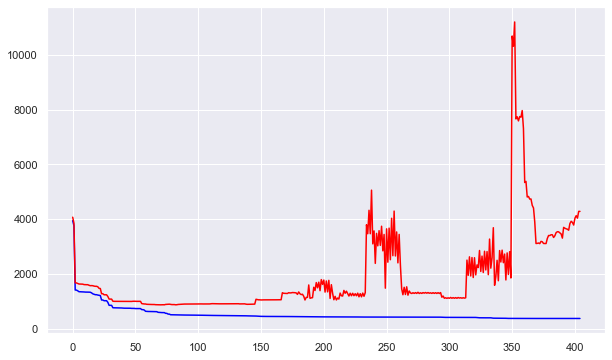

In [21]:
index_of_index = [i for i in range(len(X.columns)-1)]

sns.lineplot(x=index_of_index, y=in_sample_rmse_by_iteration, color = "blue")
sns.lineplot(x=index_of_index, y=oos_rmse_by_iteration, color = "red")

We can kind of see what the optimal model is above. If we want an exact procedure, we'd probably fit a separate smoothing regression to the oos results and analytically find the arg-minimum, $j^*$. That number will then be fed into the model matrix to create the right feature set and the final model will be produced with all the data. Or we can just stop as soon as oos error goes up. You can also obviously do CV within each iterations to stabilize this further (lab exercise).

What is the "optimal model"?

Can we honestly assess future performance now? No... why? Our test set was really our select set and we don't have a third test set (lab exercise). Inner and outer folding can be done too as we discussed.